In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import qfin as qf

In [15]:


def black_sholes_call(S, K, sigma, r, t):
    d1 = (np.log( S / K) + (r + (sigma**2) / 2) * t ) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    C = S * norm.cdf(d1) - K * np.exp(- r * t) * norm.cdf(d2)
    return C




In [16]:
S = 100
K = 100
sigma = .3
r = .05
t = 1

In [17]:
black_sholes_call(S, K, sigma, r, t)

np.float64(14.231254785985819)

PnL on Trading Options

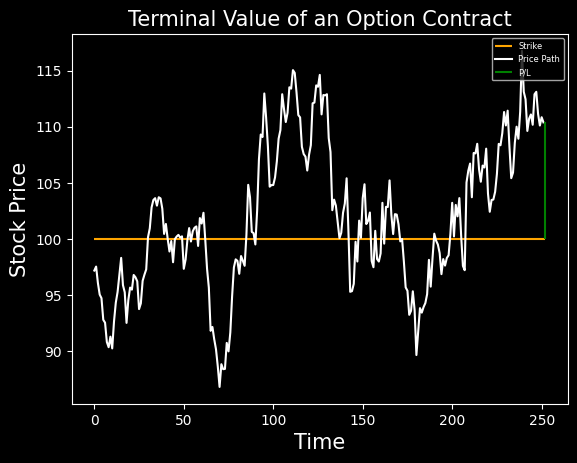

Premium at t=0 14.231254785985819
P/L/ -3.84056679695788


In [65]:

path = qf.simulations.GeometricBrownianMotion(100, 0.05, .3, 1/252, 1) #start price of 100

plt.style.use('dark_background')
plt.title('Terminal Value of an Option Contract', size = 15)
plt.hlines(100, 0, 252, label = 'Strike', color = 'orange') #strike price of 100
plt.plot(path.simulated_path, label = 'Price Path', color = 'white')

if max(path.simulated_path[-1] - 100, 0) == 0: #Strike price of 100
    plt.vlines(252, path.simulated_path[-1], 100, color = 'red', label = 'P/L')

else:
    plt.vlines(252, 100,  path.simulated_path[-1], color = 'green', label = 'P/L')


plt.xlabel('Time', size =15)
plt.ylabel('Stock Price', size =15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(loc=1, prop={'size': 6})
plt.show()
           
print('Premium at t=0', black_sholes_call(S, K, sigma, r, t))
print('P/L/', max(path.simulated_path[-1] - 100, 0) - black_sholes_call(S, K, sigma, r, t))



In [66]:
print('Call Price', black_sholes_call(S, K, sigma, r, t))
print('Market Maket Quote', "13.43 @ 14.10") #13.43 is the bid price – the price the market maker is willing to pay to buy the option from you.
                                            #14.10 is the ask price – the price the market maker is willing to sell the option to you.


print('Trade Edge:', black_sholes_call(S, K, sigma, r, t) - 14.10)

Call Price 14.231254785985819
Market Maket Quote 13.43 @ 14.10
Trade Edge: 0.13125478598581886


Computing the P/L Edge with Respect to the Model Dynamics

In [75]:
premium = 14.10 * 100 #sold in lots of 100
pls= []

def simulation(n):
    for i in range(0,n): #simulation 100K times
        path = qf.simulations.GeometricBrownianMotion(100, 0.05, .3, 1/252, 1)
        pls.append(max(path.simulated_path[-1] - 100, 0) * 100 - premium)
    return pls
    
simulation_1 = simulation(100000)
np.mean(simulation_1)
    

np.float64(84.21866258738878)

Account simulation with 10 simulations

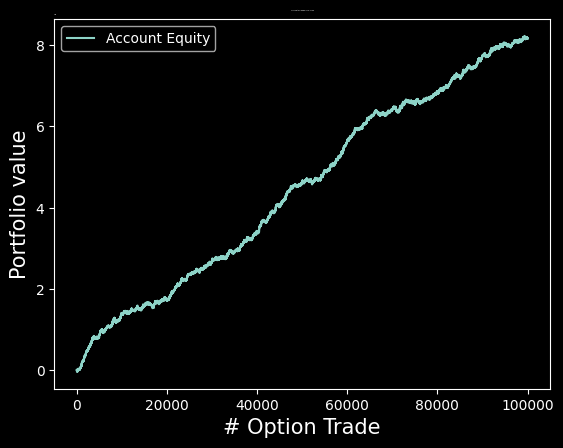

In [89]:
premium - 14.10 *100
pls = []

simulation_2 = simulation(100000)

plt.title("Trading this Edge Over Time")
plt.plot(np.cumsum(simulation_2), label = 'Account Equity')
plt.style.use('dark_background')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('# Option Trade', size = 15)
plt.ylabel('Portfolio value', size = 15)
plt.legend(fontsize = 10)
plt.show()
